In [1]:
import sys
path = ".."
if path not in (sys.path):
    sys.path.append(path)
from neural_field_optimal_planner.astar.jps import JPS
import numpy as np
import matplotlib.pyplot as plt

In [31]:
TEST_FILE = "/home/mikhail/research/Jump-Point-Search-Python/map_large_hard_3.map"

char_map = []
with open(TEST_FILE, "r") as map_file:
    for line in map_file:
        char_nodes = []
        
        for char in line:
            if(char != '\n'):
                char_nodes.append(char)
                
        char_map.append(char_nodes)

In [32]:
chars = set()
for i in range(len(char_map)):
    for j in range(len(char_map[i])):
        chars.add(char_map[i][j])
chars

{'.', '@', 'T', 'd', 's'}

In [33]:
start = None
goal = None
matrix = []
for i in range(len(char_map)):
    matrix.append([])
    for j in range(len(char_map[i])):
        if char_map[i][j] == "@" or char_map[i][j] == "T":
            value = 1
        else:
            value = 0
        matrix[-1].append(value)
        if(char_map[i][j] == 's'):
            start = (i, j)
        if(char_map[i][j] == 'd'):
            goal = (i , j)
matrix = np.array(matrix)

In [34]:
start

(17, 484)

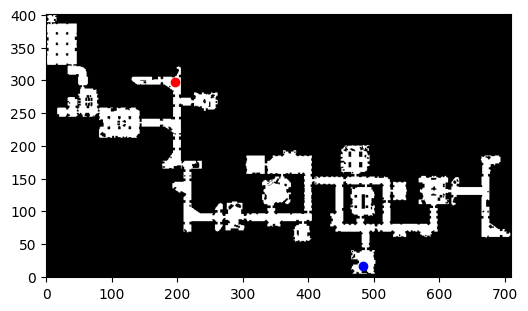

In [35]:
plt.figure(dpi=100)
plt.scatter([start[1]], [start[0]], color="blue")
plt.scatter([goal[1]], [goal[0]], color="red")
plt.imshow(1 - matrix, cmap="gray", origin="low")

# Planner

In [38]:
# %%timeit
planner = JPS(matrix, jps=False)
path = planner.find_path(start, goal)

solution found with: 19969 nodes expanded.
with path length: 593


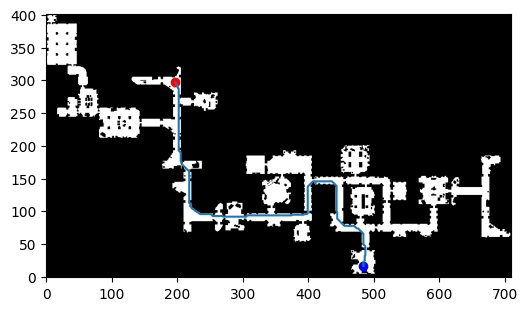

In [39]:
plt.figure(dpi=100)
plt.scatter([start[1]], [start[0]], color="blue")
plt.scatter([goal[1]], [goal[0]], color="red")
plt.plot(path[:, 1], path[:, 0])
plt.imshow(1 - matrix, cmap="gray", origin="low")

In [11]:
goal

(6, 11)